# Email/SMS Spam Filtering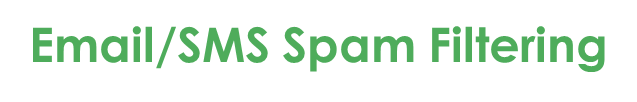

# 1- Introduction 

# 1.1 Background 

Spam filtering is a beginner’s example of document classification task which involves classifying an email as spam or non-spam (a.k.a. ham) mail.
Spam box in your Gmail account is the best example of this.
So lets get started in building a spam filter on a publicly available mail corpus. 
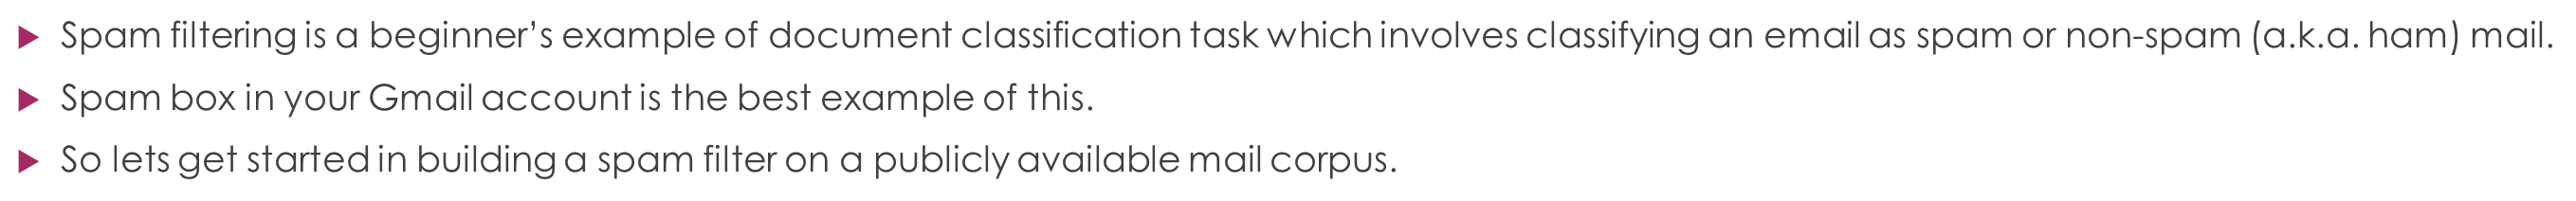

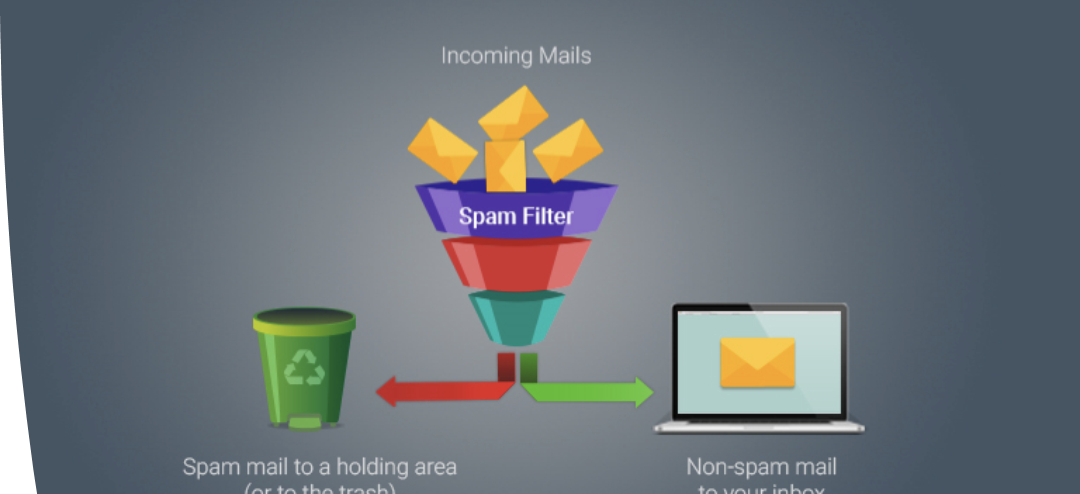

In [1]:
from IPython.display import Image
#from IPython.core.display import HTML 
Image(filename = "Spam_image.png", width = 600, height = 300)

# 1.2 About The data sets which will be used 

SMS Spam Collection Data SetDownload: Data Folder, Data Set Description
Abstract: The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.





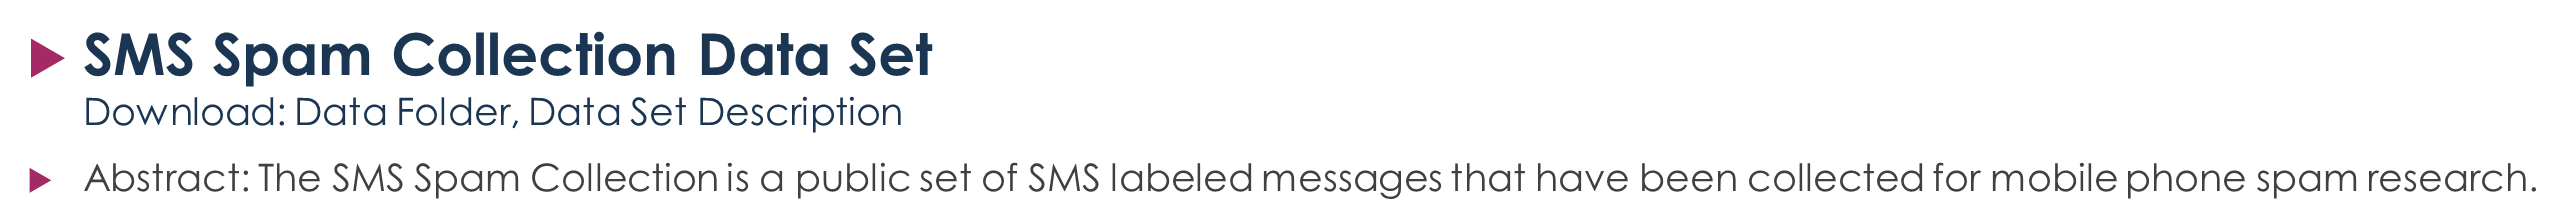

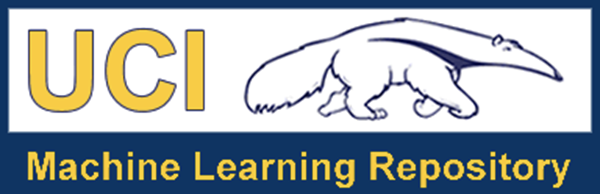

In [2]:
from IPython.display import Image
#from IPython.core.display import HTML 
Image(filename = "usi_image.png", width = 600, height = 300)

# 2. Understanding the Data 

In [3]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

**Importing The required python packages**

In [4]:

##Load the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk

# 2.1 Reading & Loading data sets 

In [5]:
#Load the dataset
# the data sets are in the same directory where the code present, so no need to specify the path 

SMS_SH_df = pd.read_csv("SMSSpamCollection.csv",sep='\t')
SMS_SH_df.head(5)

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [6]:
# it seems that the file has no headers , let us create one 
#Header=Non: because the file has no header if we didn't say NON it will take the first column as a header

SMS_SH_df = pd.read_csv("SMSSpamCollection.csv", sep='\t', header=None)
SMS_SH_df.columns = ['label', 'body_text']
SMS_SH_df.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


# 2.2 Exploring the data set

In [7]:
#DataFrame.shape ==>Return a tuple representing the dimensionality of the DataFrame.
SMS_SH_df.shape

(5568, 2)

In [8]:
#dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data
SMS_SH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5568 non-null   object
 1   body_text  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [9]:

#DataFrame.describe==>Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
#Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.
SMS_SH_df.describe()

,label,body_text
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [10]:
#How many rows are spam or ham 
SMS_SH_df.label.value_counts()

ham     4822
spam     746
Name: label, dtype: int64

In [11]:
SMS_SH_df.label.value_counts(normalize=True)

ham     0.86602
spam    0.13398
Name: label, dtype: float64

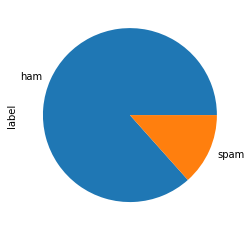

In [12]:
SMS_SH_df.label.value_counts(normalize=True).plot.pie()
plt.show()

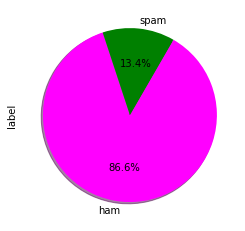

In [13]:
# Change pie chart colors here
colors = ["magenta", "green", "purple", "orange"]
SMS_SH_df.label.value_counts().plot.pie( autopct='%1.1f%%', shadow=True,startangle=60, counterclock=False,colors=colors)
plt.show()

In [14]:
#How many NULLs/ missing values
SMS_SH_df.isnull().value_counts()

label  body_text
False  False        5568
dtype: int64

In [15]:
df=SMS_SH_df.copy()

# 3. Data Preparation-Pre-processing text data


Ultimate goals from the Pre-processing text data is 
To bring the text into a form that is predictable and analyzable for our task
by
Reducing the corpus of words that exposed to the model
Explicitly correlate the word with similar meaning 
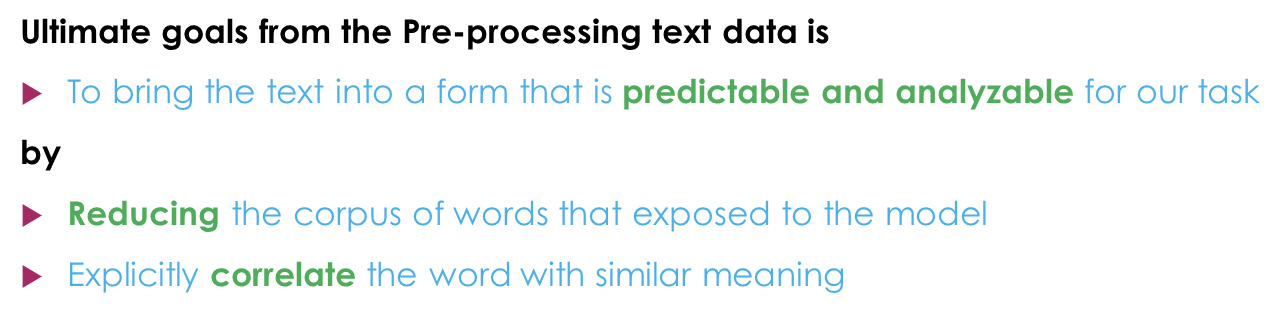



Cleaning up the text data is necessary to highlight attributes that we are going to want our model to pick up on. Cleaning (or pre-processing) the data typically consists of  number of steps:
Removing  punctuation
Converting text to lowercase
Tokenization
Removing stop-words
Lemmatization /Stemming 
Vectorization
Feature Engineering 
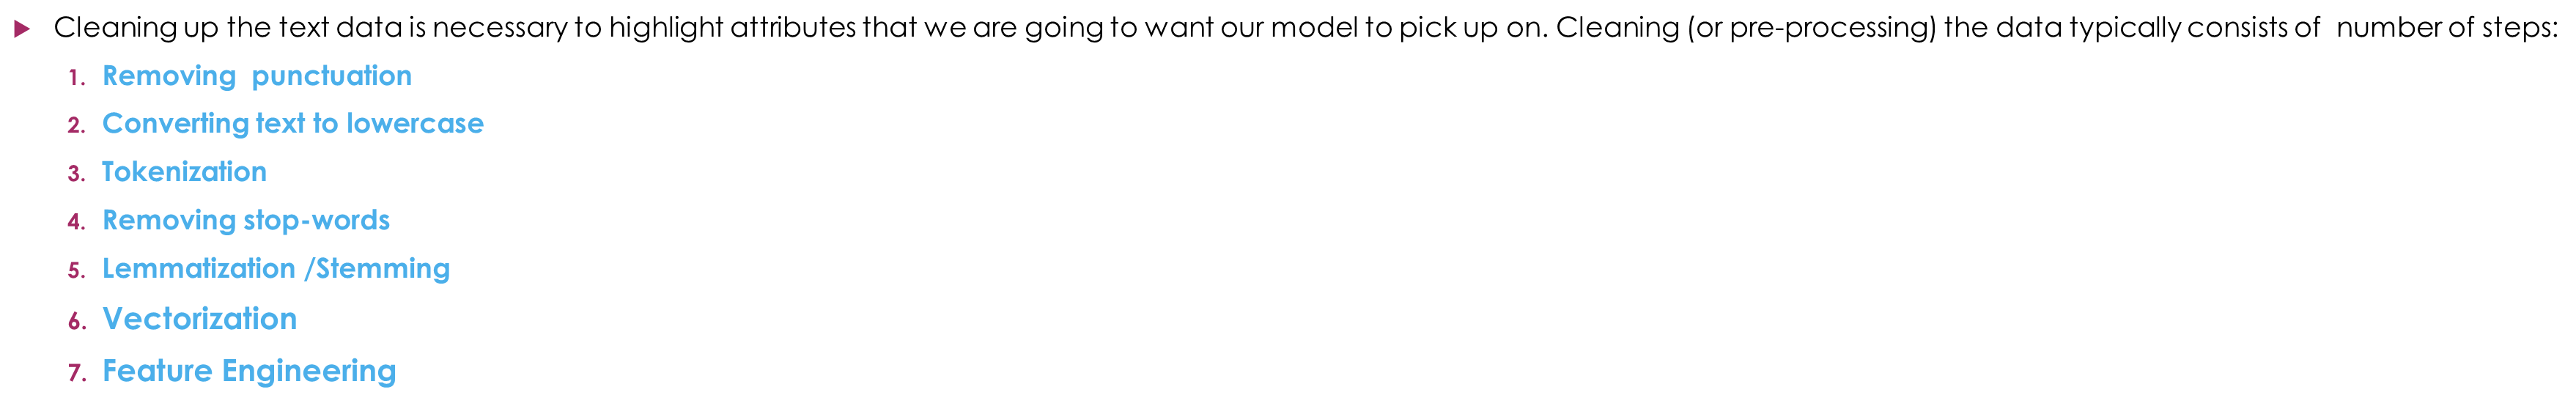

### 3.1 Remove punctuation

In [16]:

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# define punctuation
punct= string.punctuation
text='Hello!!!, I love NLP, will use python in our code.'

no_punct = ""
for char in text:
   if char not in punct:
       no_punct = no_punct + char

# display the unpunctuated string
print(no_punct)

Hello I love NLP will use python in our code


In [18]:
#list comprhansion 
#lambda function
#adding join to join chars into words 
def remove_punct(text):
    
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['body_text_nopunc'] = df['body_text'].apply(lambda x: remove_punct(x))

df.head()

,label,body_text,body_text_nopunc
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [19]:
pd.set_option('display.max_colwidth', 200)

Lambda  function :
A lambda function is a small anonymous function.
A lambda function can take any number of arguments, but can only have one expression.
The power of lambda is better shown when you use them as an anonymous function inside another function.
List Comprehension
List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.
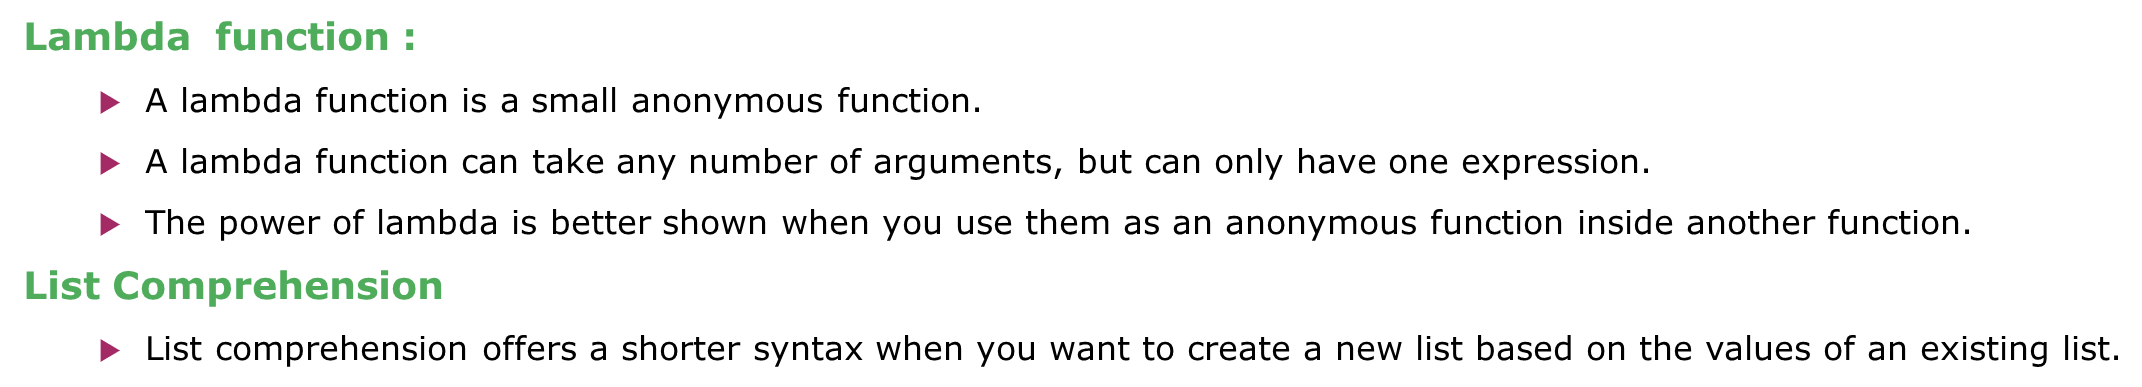


https://www.w3schools.com/python/

### 3.2 Converting text to lowercase

In [20]:
# python is case sensetive , is lower to save resources in compresion 

In [21]:
'nlp'=='NLP'.lower()


True

In [22]:
#add lower to teh remove_punc function

#list comprhansion 
#lambda function
#adding join to join chars into words 
def remove_punct(text):
    
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['body_text_nopunc'] = df['body_text'].apply(lambda x: remove_punct(x.lower()))



In [23]:
df.head()

,label,body_text,body_text_nopunc
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will


## 3.3 Tokenization

 


Tokenization is one of the most common tasks when it comes to working with text data
Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

Methods to Perform Tokenization in Python :

    Tokenization using Python’s split() function
    Tokenization using Regular Expressions (RegEx)
    Tokenization using NLTK 
    Tokenization using the other libraries like spaCy and Gensim library
    

This is important because the meaning of the text could easily be interpreted by analyzing the words present in the text.
The final Goal of Tokenization is : Creating Vocabulary 
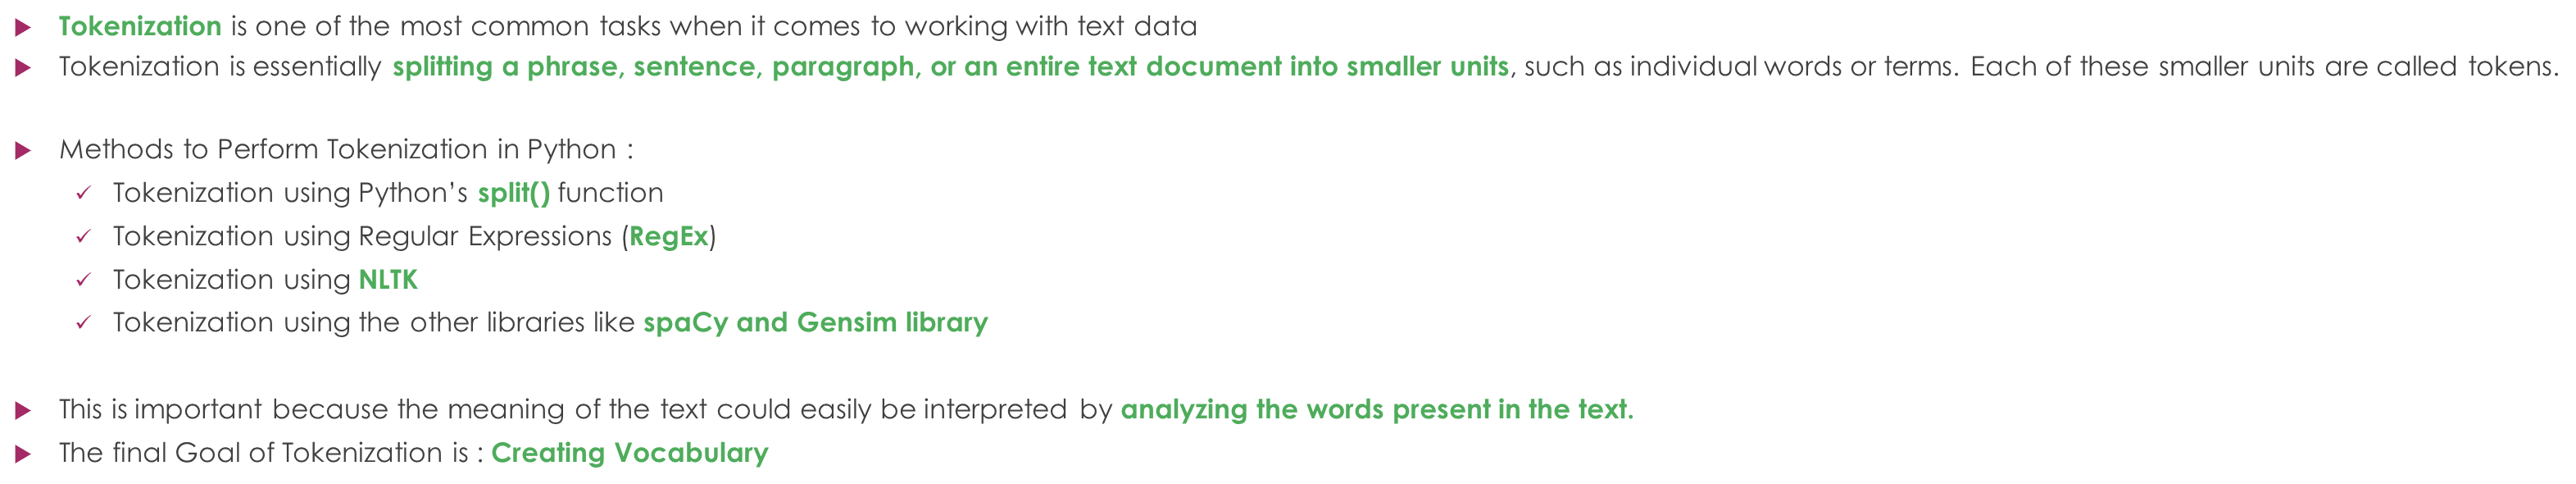

In [24]:
from nltk.tokenize import word_tokenize
#import nltk


In [25]:
import re
#\W+ regex, indicates that it will split wherever it sees one or more non-word characters.
#So that'll split on white spaces, special characters, anything like that.

text='I love NLP,will use python in our code.'
tokens = re.split('\W+', text)
tokens


['I', 'love', 'NLP', 'will', 'use', 'python', 'in', 'our', 'code', '']

In [26]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
df['body_text_tokenized'] = df['body_text_nopunc'].apply(lambda x: tokenize(x))

df.head()



,label,body_text,body_text_nopunc,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]"


### 3.4 Remove stopwords

**Stopwords** are common words that are present in the text but generally do not contribute to the meaning of a sentence. They hold almost no importance for the purposes of information retrieval and natural language processing. They can safely be ignored without sacrificing the meaning of the sentence. For example – ‘the’ and ‘a’.
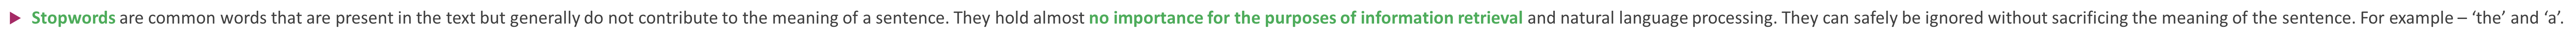

**Stop Words:** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

The NLTK package has a separate package of stop words that can be downloaded. NLTK has stop words more than 16 languages which can be downloaded and used. Once it is downloaded, it can be passed as an argument indicating it to ignore these words.

    import nltk  from nltk.corpus 
    import stopwords  set(stopwords.words('english')) 
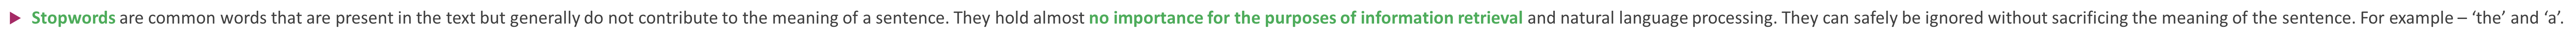

In [27]:
import nltk
from nltk.corpus import stopwords

In [28]:
stopwords_En = nltk.corpus.stopwords.words('english')


In [29]:
stopwords_En

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


**stopwords in arabic**

In [31]:
stopwords_Ar = nltk.corpus.stopwords.words('arabic')

In [32]:
stopwords_Ar

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [33]:
text_Ar='إن يوماً باقياً من العمر ... هو للمؤمن عمر ما ينبغى أن يستهان به'
text_Arـnopunct = "".join([char for char in text_Ar if char not in string.punctuation])
print('text_Arـnopunct:',text_Arـnopunct)
text_Ar_tokens = word_tokenize(text_Arـnopunct)
print('text_Ar_tokens:',text_Ar_tokens)
text_Ar_nostop = [word for word in text_Ar_tokens if word not in stopwords_Ar]
print('text_Ar_nostop:',text_Ar_nostop)


text_Arـnopunct: إن يوماً باقياً من العمر  هو للمؤمن عمر ما ينبغى أن يستهان به
text_Ar_tokens: ['إن', 'يوماً', 'باقياً', 'من', 'العمر', 'هو', 'للمؤمن', 'عمر', 'ما', 'ينبغى', 'أن', 'يستهان', 'به']
text_Ar_nostop: ['يوماً', 'باقياً', 'العمر', 'للمؤمن', 'عمر', 'ينبغى', 'يستهان']


**Note**

If the concern is with the context (e.g. sentiment analysis) of the text it might make sense to treat words differently. For example, “Not” is included as stop word but when considering context of text, negation changes the so-called valence of a text. This needs to be treated carefully and is usually not trivial.

Considering example for ‘not’-

    NLTK is a useful tool 		=> NLTK useful tool 
    NLTK is NOT a useful tool 	=> NLTK useful tool 


In [34]:
text_1='NLTK is a useful tool '
text_2='NLTK is not a useful tool '
text_1_nopunct = "".join([char for char in text_1 if char not in string.punctuation])
text_2_nopunct = "".join([char for char in text_2 if char not in string.punctuation])
text_1_tokens = word_tokenize(text_1_nopunct)
text_2_tokens = word_tokenize(text_2_nopunct)

text_1_nostop = [word for word in text_1_tokens if word not in stopwords_En]
text_2_nostop = [word for word in text_2_tokens if word not in stopwords_En]
print('text_1_nostop:',text_1_nostop)
print('text_2_nostop:',text_2_nostop)


text_1_nostop: ['NLTK', 'useful', 'tool']
text_2_nostop: ['NLTK', 'useful', 'tool']


 ### 3.5 Using Stemming
 
 
    --Stemming.  Is the process of reducing inflected or derived words to their word stem or root. 
    --Stemming is aiming to reduce variations of the same root word. 
    
    If Python sees play, playing, played and plays  as four different separate things, that means:
 it has to keep those Four separate words in memory. Imagine every variation of every root word. Maybe we have a thousand root words.
The alternative in this play, playing, played and plays   example is applying the stemmer, all different words will become one word ; play, 
 Python has to look at a lot more tokens without a stemmer and it doesn't know that these separate tokens are even related. 
In this case, we're not leaving it up to Python. We're being explicit by replacing similar words with just one common root word. 
reduce the corpus of words that exposed to the model
Explicitly correlate the word with similar meaning 
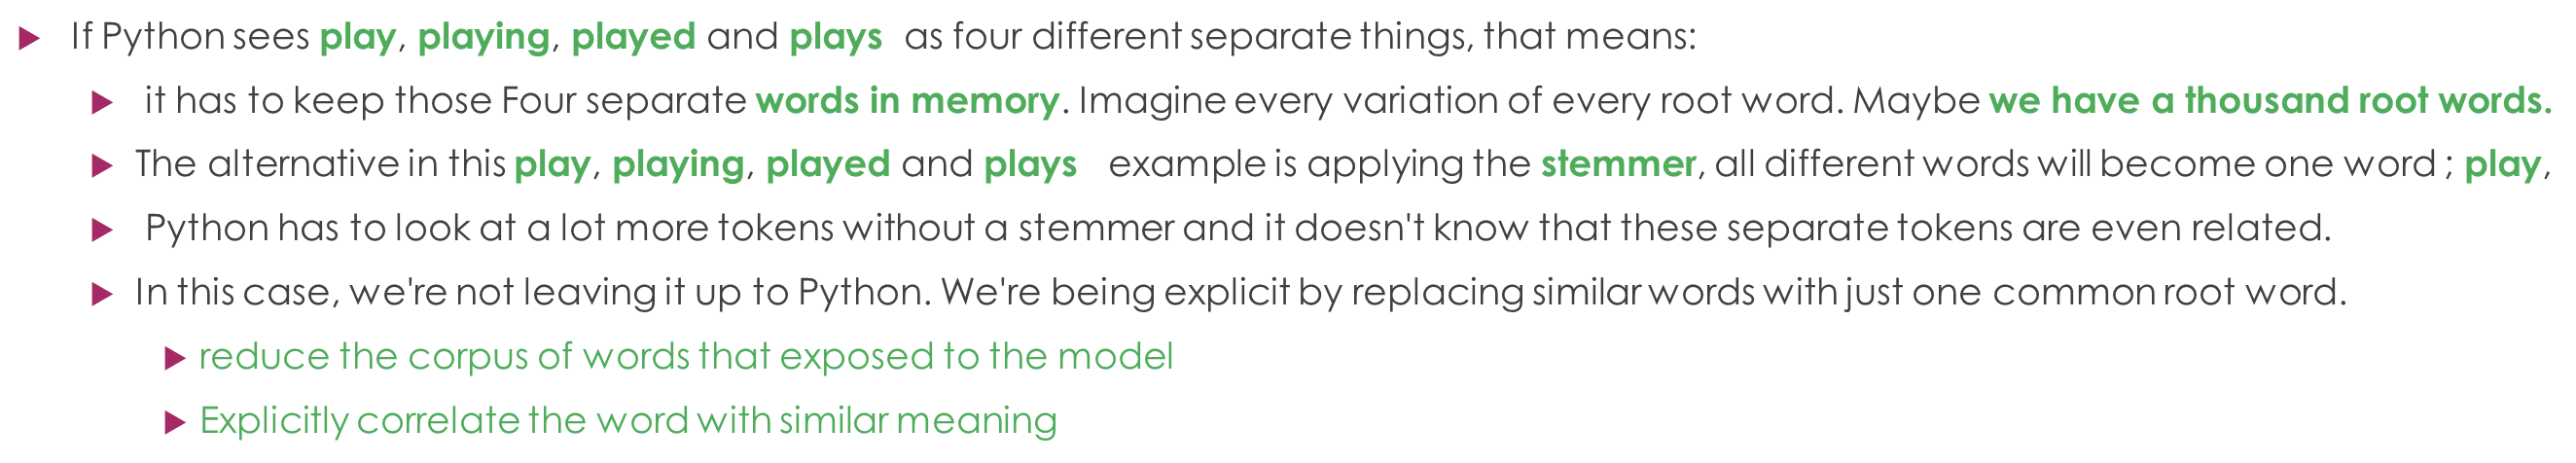


There are English and Non-English Stemmers available in nltk package. 

        --Porter Stemmer:  PorterStemmer is known for its simplicity and speed. PorterStemmer uses Suffix Stripping to produce stems
        --Lancaster Stemmer:  LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur
        --The Snowball Stemmer
        --Regex-Based Stemmer.

In [35]:
import nltk
ps = nltk.PorterStemmer()

In [36]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [37]:
print(ps.stem('play'))
print(ps.stem('playing'))
print(ps.stem('played'))
print(ps.stem('plays'))


play
play
play
play


In [38]:
#Over-Steming 
#Over-steaming occurs when two words are stemmed from the same root of different stems. 

print(ps.stem('universal'))
print(ps.stem('university'))
print(ps.stem('universe'))

univers
univers
univers


In [39]:
#Under-Steming
#Under-stemming occurs when two words are stemmed from the same root of not a different stems

print(ps.stem('alumnus'))
print(ps.stem('alumni'))
print(ps.stem('alumnae'))

alumnu
alumni
alumna


In [40]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['body_text_stemmed'] = df['body_text_nostop'].apply(lambda x: stemming(x))

df.head()

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


 ### 3.6 Using Lemmatizer
 
 Lemmatizing : The process of grouping together the inflected forms of a word so they can be analyzed as a single term.
Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language
lemmatizing is using vocabulary analysis of words to remove inflectional endings and return to the dictionary form of a word. 
So again : play, playing, played and plays  would all be simplified down to play, because that's the root of the word. Each variation carries the same meaning just with slightly different tense. 
Will use the WordNet lemmatizer. This is probably the most popular lemmatizer. 
WordNet is a collection of nouns, verbs, adjective and adverbs that are grouped together in sets of synonyms, each expressing a distinct concept. 
This lemmatizer runs off of this corpus of synonyms, so given a word, it will track that word to its synonyms, and then the distinct concept that that group of words represents. 
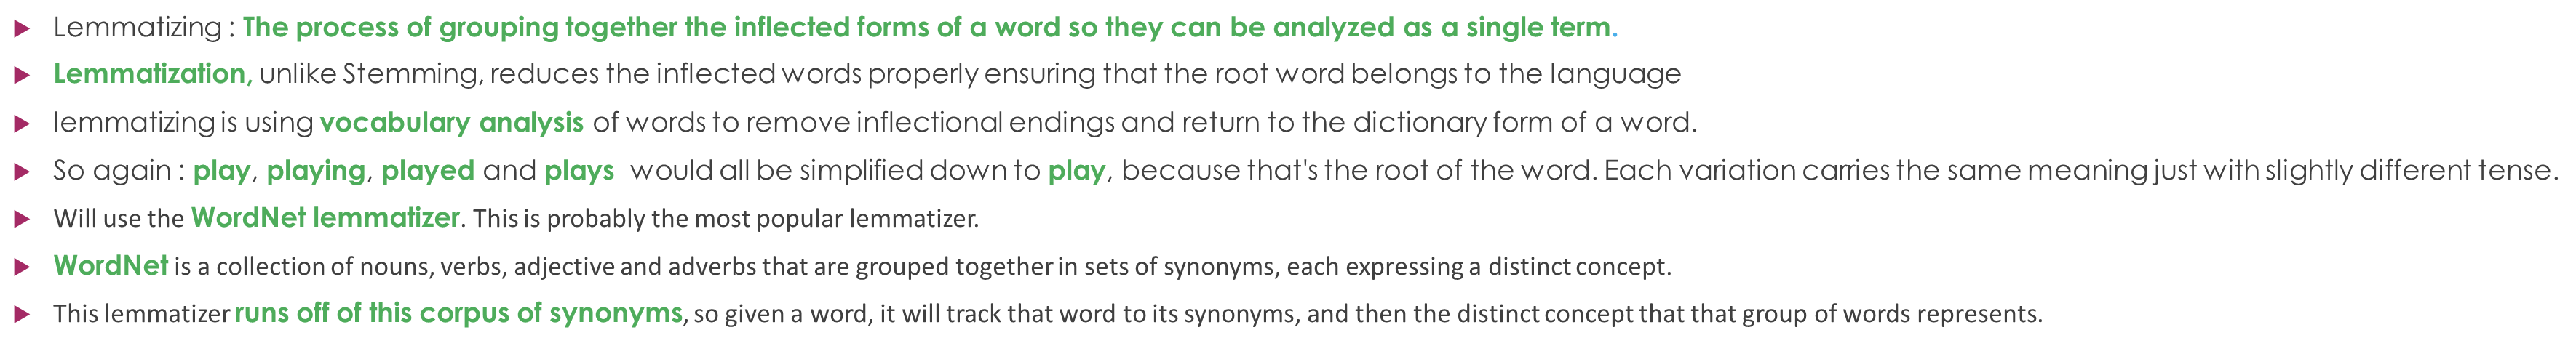

In [41]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahmadshhadeh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [43]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [44]:
print(wn.lemmatize('universal'))
print(wn.lemmatize('university'))
print(wn.lemmatize('universe'))

universal
university
universe


In [45]:
print(wn.lemmatize('alumnus'))
print(wn.lemmatize('alumni'))
print(wn.lemmatize('alumnae'))

alumnus
alumnus
alumna


In [46]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['body_text_lemmatized'] = df['body_text_nostop'].apply(lambda x: lemmatizing(x))

df.head(5)

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, time]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [47]:
### Create function to remove punctuation, tokenize, remove stopwords, and stem

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text
df=df[['label','body_text']]
df['cleaned_text'] = df['body_text'].apply(lambda x: clean_text(x))

In [48]:
df.shape

(5568, 3)

In [49]:
df.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


# 4. Vectorizing text data

**Vectorizing :** The process that we use to convert text to a form that Python and a machine learning model can understand,will Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.


This is defined as the process of encoding text as integers to create feature vectors. 
A feature vector is an n-dimensional vector of numerical features that represent some object. So in our context, that means we'll be taking an individual text message and converting it to a numeric vector that represents that text message. 


There are many vectorization techniques, we will focus on the three widely used vectorization techniques:

     --Count vectorization
     --N-Grams.
     --Term frequency - inverse document frequency (TF-IDF)



## 4.1 Vectorizing text data on sample 


We will create a matrix that only has numeric entries counting how many times each word appears in each text message. The machine learning algorithm understands these counts. So if it sees a one or a two or a three in a cell, then that model can start to correlate that with whatever we're trying to predict 

In [50]:
sentences = ["good movie", "not a good movie", "did not like", "i like it"]

### 4.1.1: Count vectorization

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_cv = vectorizer.fit_transform(sentences)
print(features_cv.shape)
print('Sparse Matrix :\n', features_cv)
features_cv = pd.DataFrame(features_cv.toarray())
features_cv.columns = vectorizer.get_feature_names()
features_cv


(4, 6)
Sparse Matrix :
   (0, 1)	1
  (0, 4)	1
  (1, 1)	1
  (1, 4)	1
  (1, 5)	1
  (2, 5)	1
  (2, 0)	1
  (2, 3)	1
  (3, 3)	1
  (3, 2)	1


,did,good,it,like,movie,not
0,0,1,0,0,1,0
1,0,1,0,0,1,1
2,1,0,0,1,0,1
3,0,0,1,1,0,0


### 4.1.2: Vectorizing Data: N-Grams 

In [52]:

ngram_vect = CountVectorizer(ngram_range=(1,3))
features_ng = ngram_vect.fit_transform(sentences)
print(features_ng.shape)
print('Sparse Matrix :\n', features_ng)
features_ng = pd.DataFrame(features_ng.toarray())
features_ng.columns = ngram_vect.get_feature_names()
features_ng



(4, 13)
Sparse Matrix :
   (0, 3)	1
  (0, 8)	1
  (0, 4)	1
  (1, 3)	1
  (1, 8)	1
  (1, 4)	1
  (1, 9)	1
  (1, 10)	1
  (1, 11)	1
  (2, 9)	1
  (2, 0)	1
  (2, 6)	1
  (2, 1)	1
  (2, 12)	1
  (2, 2)	1
  (3, 6)	1
  (3, 5)	1
  (3, 7)	1


,did,did not,did not like,good,good movie,it,like,like it,movie,not,not good,not good movie,not like
0,0,0,0,1,1,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,1,1,1,1,0
2,1,1,1,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,1,1,1,0,0,0,0,0


### 4.1.3: Vectorizing Data: TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(1,3))
features_tfidf = tfidf.fit_transform(sentences)
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf


(4, 13)
Sparse Matrix :
   (0, 4)	0.5773502691896257
  (0, 8)	0.5773502691896257
  (0, 3)	0.5773502691896257
  (1, 11)	0.47212002654617047
  (1, 10)	0.47212002654617047
  (1, 9)	0.3722248517590162
  (1, 4)	0.3722248517590162
  (1, 8)	0.3722248517590162
  (1, 3)	0.3722248517590162
  (2, 2)	0.43671930987511215
  (2, 12)	0.43671930987511215
  (2, 1)	0.43671930987511215
  (2, 6)	0.3443145201184689
  (2, 0)	0.43671930987511215
  (2, 9)	0.3443145201184689
  (3, 7)	0.6176143709756019
  (3, 5)	0.6176143709756019
  (3, 6)	0.48693426407352264


,did,did not,did not like,good,good movie,it,like,like it,movie,not,not good,not good movie,not like
0,0.000000,0.000000,0.000000,0.577350,0.577350,0.000000,0.000000,0.000000,0.577350,0.000000,0.00000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.372225,0.372225,0.000000,0.000000,0.000000,0.372225,0.372225,0.47212,0.47212,0.000000
2,0.436719,0.436719,0.436719,0.000000,0.000000,0.000000,0.344315,0.000000,0.000000,0.344315,0.00000,0.00000,0.436719
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.617614,0.486934,0.617614,0.000000,0.000000,0.00000,0.00000,0.000000


### 4.1.4  Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

when you have a matrix in which a very high percent of the entries are zero, instead of storing all these zeros in the full matrix, which would make it extremely inefficient, it'll just be converted to only storing the locations and the values of the non-zero elements, which is much more efficient for storage![image.png](attachment:image.png)

##

    --features_tfidf = pd.DataFrame(features_tfidf.toarray())
    
    --features_tfidf.columns = tfidf.get_feature_names()
    
    --features_tfidf

## 4.2 Vectorizing text data

### 4.2.1: Count vectorization

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# To create a Count Vectorizer, we simply need to instantiate one.
# There are special parameters we can set here when making the vectorizer, but
# for the most basic example, it is not needed.


vectorizer = CountVectorizer()
features_CountVec = vectorizer.fit_transform(df['cleaned_text'])
print(features_CountVec.shape)
print('Sparse Matrix :\n', features_CountVec)
features_CountVec = pd.DataFrame(features_CountVec.toarray())
features_CountVec.columns = vectorizer.get_feature_names()
features_CountVec

(5568, 8090)
Sparse Matrix :
   (0, 3983)	1
  (0, 6219)	1
  (0, 6032)	1
  (0, 7835)	1
  (0, 7032)	1
  (0, 1681)	1
  (0, 5746)	2
  (0, 7826)	1
  (0, 6925)	1
  (0, 3571)	1
  (0, 3391)	1
  (0, 3187)	1
  (0, 7825)	1
  (0, 1568)	1
  (0, 7136)	1
  (1, 3127)	1
  (1, 2783)	2
  (1, 7805)	1
  (1, 2110)	1
  (1, 7771)	1
  (1, 2901)	2
  (1, 2279)	1
  (1, 3003)	1
  (1, 7158)	1
  (1, 452)	1
  :	:
  (5564, 3661)	1
  (5564, 3313)	1
  (5564, 3116)	1
  (5564, 2811)	1
  (5565, 6820)	1
  (5565, 4824)	1
  (5565, 5518)	1
  (5565, 6518)	1
  (5566, 3127)	1
  (5566, 4360)	1
  (5566, 7681)	1
  (5566, 5005)	1
  (5566, 7462)	1
  (5566, 6540)	1
  (5566, 1765)	1
  (5566, 2741)	1
  (5566, 3232)	1
  (5566, 3454)	1
  (5566, 3793)	1
  (5566, 3908)	1
  (5566, 986)	1
  (5566, 1552)	1
  (5567, 4927)	1
  (5567, 7296)	1
  (5567, 6060)	1


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2.2: Vectorizing Data: N-Grams

In [55]:

ngram_vect = CountVectorizer(ngram_range=(1,3))
features_ngram = ngram_vect.fit_transform(df['cleaned_text'])
print(features_ngram.shape)
print('Sparse Matrix :\n', features_ngram)
features_ngram = pd.DataFrame(features_ngram.toarray())
features_ngram.columns = ngram_vect.get_feature_names()
features_ngram



(5568, 71114)
Sparse Matrix :
   (0, 32012)	1
  (0, 52679)	1
  (0, 51097)	1
  (0, 68874)	1
  (0, 60069)	1
  (0, 9211)	1
  (0, 48951)	2
  (0, 68761)	1
  (0, 58737)	1
  (0, 28173)	1
  (0, 26314)	1
  (0, 23047)	1
  (0, 68699)	1
  (0, 8482)	1
  (0, 61547)	1
  (0, 32090)	1
  (0, 52702)	1
  (0, 51188)	1
  (0, 68924)	1
  (0, 60080)	1
  (0, 9212)	1
  (0, 48973)	1
  (0, 68833)	1
  (0, 58823)	1
  (0, 28203)	1
  :	:
  (5566, 30234)	1
  (5566, 31689)	1
  (5566, 9814)	1
  (5566, 19004)	1
  (5566, 67204)	1
  (5566, 23403)	1
  (5566, 64906)	1
  (5566, 26815)	1
  (5566, 8404)	1
  (5566, 3613)	1
  (5566, 35441)	1
  (5566, 30235)	1
  (5566, 31690)	1
  (5566, 9815)	1
  (5566, 55820)	1
  (5566, 19005)	1
  (5566, 42869)	1
  (5566, 67205)	1
  (5566, 23404)	1
  (5567, 41870)	1
  (5567, 63280)	1
  (5567, 51387)	1
  (5567, 51390)	1
  (5567, 63304)	1
  (5567, 51391)	1


,008704050406,008704050406 sp,008704050406 sp arrow,0089mi,0089mi last,0089mi last four,0121,0121 2025050,0121 2025050 visit,01223585236,...,zyada kisi ko,üll,üll finish,üll finish buy,üll submit,üll submit da,üll take,üll take forev,〨ud,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2.3: Vectorizing Raw Data: TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(1,1))
features_tfidf = tfidf.fit_transform(df['cleaned_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf


(5568, 8090)
Sparse Matrix :
   (0, 7136)	0.14980274830529214
  (0, 1568)	0.26089434037596076
  (0, 7825)	0.21150110049571239
  (0, 3187)	0.31823811606369057
  (0, 3391)	0.31823811606369057
  (0, 3571)	0.20015469242175096
  (0, 6925)	0.16255603874008892
  (0, 7826)	0.19951269863634857
  (0, 5746)	0.5087965592478143
  (0, 1681)	0.31823811606369057
  (0, 7032)	0.17885394474810676
  (0, 7835)	0.20080846656471296
  (0, 6032)	0.18300600862568117
  (0, 6219)	0.23121804559946996
  (0, 3983)	0.19105676866553414
  (1, 71)	0.23441859993383393
  (1, 1217)	0.16767154223015557
  (1, 5864)	0.23441859993383393
  (1, 7340)	0.12407725477387192
  (1, 5818)	0.23441859993383393
  (1, 5906)	0.16121500299571126
  (1, 869)	0.220374265813368
  (1, 7017)	0.11827553689542254
  (1, 439)	0.22650924112721355
  (1, 4631)	0.15876953402416374
  :	:
  (5564, 2811)	0.6620560655763604
  (5564, 3116)	0.5770129634723191
  (5564, 3313)	0.29647975192592235
  (5564, 3661)	0.37528330993582115
  (5565, 6518)	0.5375492893687822

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Feature Engineering

Feature engineering :  is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.
Feature engineering asks: what is the best representation of the sample data to learn a solution to your problem? How to turn your inputs into things the algorithm can understand
some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used.
One of the most factor of success or fail some machine learning projects succeed is the features used.
Feature engineering efforts mainly have two goals:
Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
Improving the performance of machine learning models,(the features that will not add any value will not be considered in order to keep space and time)
Better features mean:  flexibility, simpler models & better results 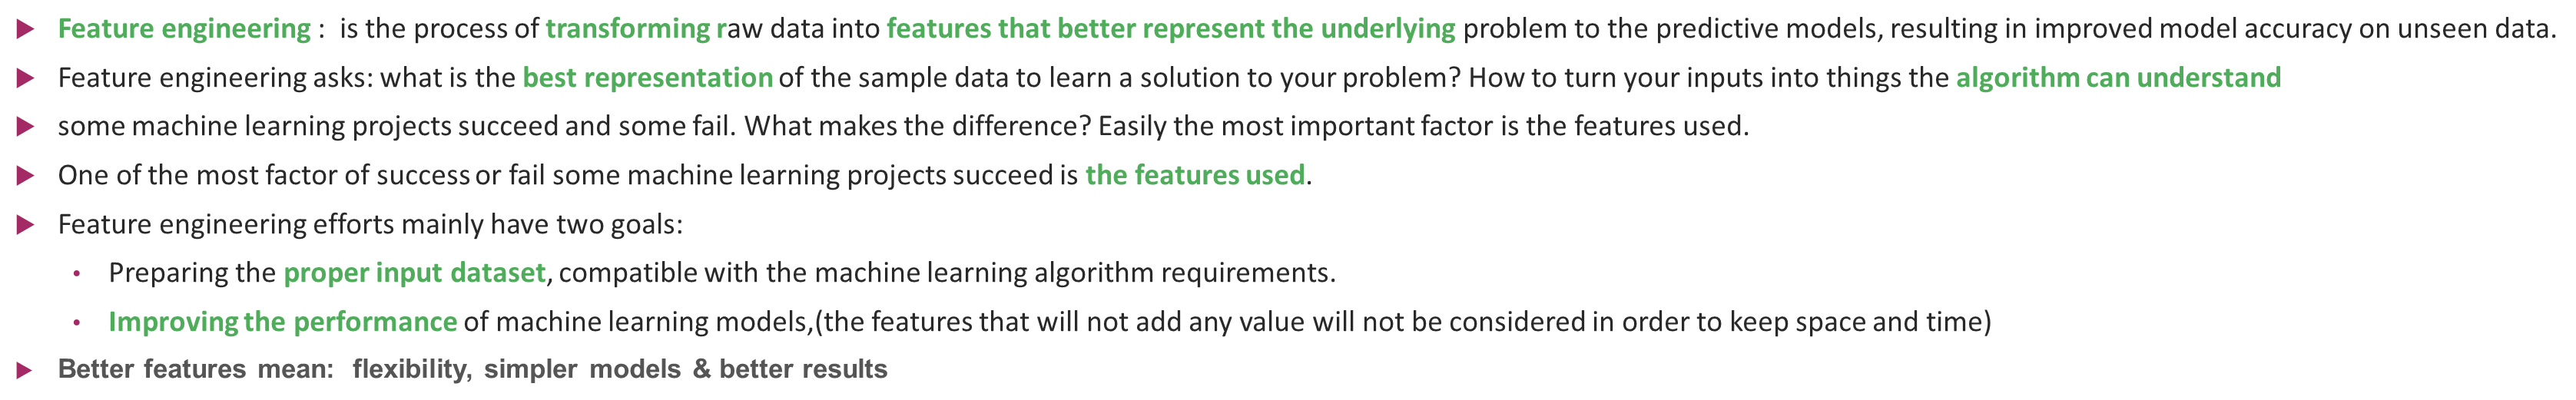

In [57]:
df.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


## 5.2: Create feature for the message length 

     - Count length of message using len function 
     - Subtract the white spaces from the message length 

In [58]:
df['body_len'] = df['body_text'].apply(lambda x: len(x)-x.count(' ') )
df.head()

,label,body_text,cleaned_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28


## 5.2: Create feature for percent of text that is punctuation

     - Scan the text message and return 1 where ever we found punctuations
     - Perform summation for all return 1s
     - Divide the number of punctuation on the total message length to get teh percentage

In [59]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round( count/(len(text) - text.count(" ")),3)*100

df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['body_text'].apply(lambda x: count_punct(x))
df.head()

,label,body_text,cleaned_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1


## 5.3: Create feature for The percent of characters in capital letters

In [60]:
import string

def count_Cap(text):
    count = sum([1 for char in text if char.isupper()])
    return round( count/(len(text) - text.count(" ")),3)*100

df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df['cap%'] = df['body_text'].apply(lambda x: count_Cap(x))
df.head()

,label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160,2.5,1.9
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128,4.7,7.8
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49,4.1,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62,3.2,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1,92.9


In [61]:
df.describe()

,body_len,punct%,cap%
count,5568.000000,5568.000000,5568.000000
mean,65.779095,7.097719,7.949210
std,48.820351,6.630779,13.313457
min,2.000000,0.000000,0.000000
25%,29.000000,3.300000,3.100000
50%,50.000000,5.500000,4.500000
75%,99.250000,9.100000,7.400000
max,740.000000,100.000000,100.000000


## 5.4 Rescaling the Features
Scaling doesn't impact the model. it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale, there are two common ways of rescaling:

Min-Max scaling (Normalization between 0 and 1)
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling,

We have two approaches here as the instructor explained in the pre-assignment session

1- Applying scaling first only for the training dat set by applying fit and transform, then applying transformation for the testing data

2- Applying the scaling one time for the complete data set which include the test and training data set, which can serve our purpose, We are going with the second approach.

So,We will do the scaling for the whole data set for this project.

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [63]:
num_vars = ['body_len','punct%','cap%']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [64]:
df.head()

,label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,0.214092,0.025,0.019
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,0.170732,0.047,0.078
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,0.063686,0.041,0.041
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,0.081301,0.032,0.032
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,0.035230,0.071,0.929


# 6. Model Building

## 6.1 ML algorithm selection 

    - There are so many Machine learning in the world ,Which machine learning Should we use ? 
    - There is no straightforward and sure-shot way to choose the right MLA. Determining which algorithm to use depends on many factors like:
    - The problem statement ,The kind of output we are looking . 
    - Type and size of the data,
    - The available computational time/Resources(Memory, Type of processors ),
    Number of features, and observations in the data
    …etc 
    Key skills can help :
    - Domain knowledge to filter down (CV, NLP, anomaly detection .. etc ) 
    - Machine Learning Types : Supervised and Unsupervised
    - Data science project Pipeline


In [65]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "ML_selection.png")

## 6.2 Final data frame to use it in the Model

In [66]:
df.head()

,label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,0.214092,0.025,0.019
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,0.170732,0.047,0.078
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,0.063686,0.041,0.041
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,0.081301,0.032,0.032
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,0.035230,0.071,0.929


In [67]:
target= df['label']

final_df=df.drop(['label', 'body_text', 'cleaned_text'], axis=1)


In [68]:
features_tfidf.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
final_df = pd.concat([final_df, pd.DataFrame(features_tfidf)], axis=1)


In [70]:
final_df.head()

,body_len,punct%,cap%,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.214092,0.025,0.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.047,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.081301,0.032,0.032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035230,0.071,0.929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
target.head()

0     ham
1    spam
2     ham
3     ham
4     ham
Name: label, dtype: object

## 6.3 Split Training and Testing Data Sets

The train-test split is a technique for evaluating the performance of a machine learning algorithm, It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. 

    Train Dataset: Used to fit the machine learning model.
    Test Dataset: Used to evaluate the fit machine learning model: not used to train the model
    
**The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.**


 
   <font color= blue>
    
    -- train_size is the number that defines the size of the training set. If you provide a float, then it must be between 0.0 and 1.0 and will define the share of the dataset used for testing. If you provide an int, then it will represent the total number of the training samples. The default value is None.

    -- test_size is the number that defines the size of the test set. It’s very similar to train_size. You should provide either train_size or test_size. If neither is given, then the default share of the dataset that will be used for testing is 0.25, or 25 percent.

    --random_state is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. The default value is None.
   </font>

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df,target,test_size=0.25)

In [73]:
print('X_train.shape= ',X_train.shape)
print('X_test.shape= ',X_test.shape)
print('y_train.shape= ',y_train.shape)
print('y_test.shape= ',y_test.shape)     
      

X_train.shape=  (4176, 8093)
X_test.shape=  (1392, 8093)
y_train.shape=  (4176,)
y_test.shape=  (1392,)


In [74]:
X_train.head()

,body_len,punct%,cap%,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
3455,0.055556,0.047,0.023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5107,0.029810,0.167,0.042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5099,0.107046,0.012,0.235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4045,0.066396,0.020,0.039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4873,0.155827,0.111,0.205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
y_train.head()

3455     ham
5107     ham
5099     ham
4045     ham
4873    spam
Name: label, dtype: object

## 6.4 Random Forest  Algorithem 

In [76]:
from sklearn.ensemble import RandomForestClassifier


In [77]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier()


In [78]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [79]:
rf_model.score(X_test,y_test)

0.9741379310344828

In [80]:
rf_model = RandomForestClassifier(n_jobs=-1,n_estimators=200)
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)

0.9741379310344828

### 6.4.1 Checking the feature_importances

In [81]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.045375186740382725, 'body_len'),
 (0.037200235215679764, 'cap%'),
 (0.03158523627088397, 'txt'),
 (0.027179030504442484, 'call'),
 (0.020773893459960162, 'mobil'),
 (0.020430724290748197, 'claim'),
 (0.019687235399248524, 'free'),
 (0.016282409591983515, 'servic'),
 (0.014307087986357764, 'prize'),
 (0.013183465573010157, 'stop')]